In [1]:
import keras
import glob
import string
import cv2
import matplotlib
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import imageio as im
import warnings
warnings.filterwarnings('ignore')
from keras.models import load_model

Using TensorFlow backend.


In [2]:
model = load_model('CNN_c4l-16x16_550.h5')

In [33]:
png_files = glob.glob('resized_data/*.png')
index_var = "0123456789"+string.ascii_lowercase+string.ascii_uppercase
index_ml = {}
count = 0
index = {}
rev_index_ml = {}
for char in index_var:
    index[char] = 0
    # if the character is present then assign a numeric map to it
    if len(glob.glob('resized_data/{}*.png'.format(char)))>0:
        index_ml[char] = count
        rev_index_ml[count] = char
        count += 1
index_ml

{'2': 0,
 '3': 1,
 '4': 2,
 '5': 3,
 '6': 4,
 '7': 5,
 '8': 6,
 '9': 7,
 'A': 8,
 'B': 9,
 'C': 10,
 'D': 11,
 'E': 12,
 'F': 13,
 'G': 14,
 'H': 15,
 'J': 16,
 'K': 17,
 'L': 18,
 'M': 19,
 'N': 20,
 'P': 21,
 'Q': 22,
 'R': 23,
 'S': 24,
 'T': 25,
 'U': 26,
 'V': 27,
 'W': 28,
 'X': 29,
 'Y': 30,
 'Z': 31}

In [34]:
# load the captcha images 
# convert to binary image
# extract the characters
# predict the images
png_files = glob.glob('predict/*.png')
png_files[:10]

['predict/2PBG.png',
 'predict/2DQU.png',
 'predict/2K8R.png',
 'predict/2BVK.png',
 'predict/2AD9.png',
 'predict/2QJT.png',
 'predict/2GZ9.png',
 'predict/2P3Z.png',
 'predict/2J2T.png',
 'predict/2DNL.png']

In [43]:
def predict_captcha(img_file,item_name):
    char_ = [ch for ch in item_name]
    thres = img_file.copy()
    k = 0

    ROI_number = 0
    """
                0 0 0 0 0 0 0 0 
                0 0 0 3 0 4 0 0 
                0 0 1 0 4 3 0 0 
                0 0 2 0 4 4 0 0 
                0 0 1 0 4 0 0 0
                0 0 0 4 3 0 0 0
                0 0 0 0 0 0 0 0
                0 0 0 0 0 0 0 0
                    
                    |\/|
                
                    0 0 0 0 
                    0 3 0 4 
                    1 0 4 3 
                    2 0 4 4 
                    1 0 4 0 
                    0 4 3 0 
                    0 0 0 0 
                    0 0 0 0 
    """
    for y in range(thresh.shape[1]):
        dummy = 0
        for x in range(thresh.shape[0]):
            #print(thresh[x][y],end=" ")
            if thresh[x][y] == 0:
                # if character is found
                dummy = 1
        if dummy ==1:
            if k ==1:
                sart_col = y
            k += 1
        if dummy == 0 and k >2:
            end_col = y
            k1 = 0
            # find contours within that region
            #print("Start = ",sart_col," End = ",end_col)
            extract_im = thresh[:,sart_col-2:end_col+1].copy()
            """
                0 0 0 0 
                0 3 0 4 
                1 0 4 3 
                2 0 4 4 
                1 0 4 0 
                0 4 3 0 
                0 0 0 0 
                0 0 0 0 

                  |\/|
                   
                0 3 0 4 
                1 0 4 3 
                2 0 4 4 
                1 0 4 0 
                0 4 3 0 
            """
            for x1 in range(extract_im.shape[0]):
                dummy1 = 0
                for y1 in range(extract_im.shape[1]):
                    if extract_im[x1][y1] == 0:
                        #if char is found
                        dummy1 = 1
                if dummy1 == 1:
                    if k1 == 1:
                        start_row = x1
                    k1 += 1
                if dummy1 == 0 and k1>2:
                    end_row = x1
                    #print("Start row = ",start_row," End = ",end_row)
                    ROI = extract_im[start_row-2:end_row+1,:].copy()
                    ROI = 255 - ROI #inverse it
                    if ROI_number>=4:
                        continue
                    cv2.imwrite('ROI-{}.png'.format(ROI_number), ROI)
                    index[char_[ROI_number]] += 1
                    break
            k=0
            #print("ROI_num = ",ROI_number)
            ROI_number += 1

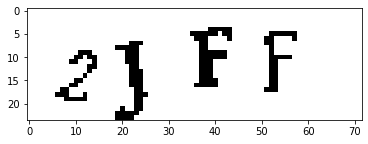

Item name =  2JFF  Predicted Value =  2AFF


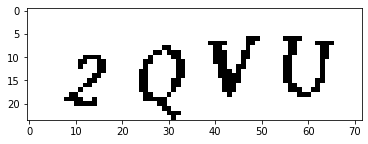

Item name =  2QVU  Predicted Value =  2JVU


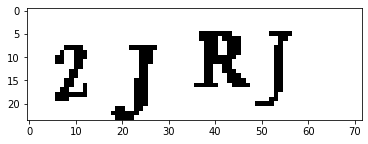

Item name =  2JRJ  Predicted Value =  2KRJ


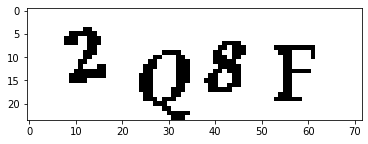

Item name =  2Q8F  Predicted Value =  2A8F


In [53]:
good_pred = 0
bad_pred = 0
total_files = len(png_files)
for item in png_files:
    img_file = cv2.imread(item)
    gray = cv2.cvtColor(img_file, cv2.COLOR_BGR2GRAY)
    #plt.imshow(gray,cmap='gray')
    #plt.show()
    ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_OTSU)
    thresh = cv2.convertScaleAbs(thresh)
    thres_im = thresh.copy()
    item_name = str(item.split('/')[1]).split('.')[0]
    #print(item_name)
    predict_captcha(img_file,item_name)
    # note, the current directory should be clean and these temporary files will be 
    # generated during the execution of the script
    str_pre = ""
    for num in range(4):
        ROI_img = "ROI-{}.png".format(num)
        read_roi = cv2.imread(ROI_img, cv2.IMREAD_UNCHANGED)
        resized = cv2.resize(read_roi, (16,16), interpolation = cv2.INTER_AREA)
        ret, thresh = cv2.threshold(resized, 0, 255, cv2.THRESH_OTSU)
        thresh = cv2.convertScaleAbs(thresh)
        thresh = thresh[np.newaxis,:, :, np.newaxis]/255.0
        y_prob = model.predict(thresh)
        prediction = y_prob.argmax(axis=-1)
        char_ = rev_index_ml[int(prediction)]
        #print(char_)
        str_pre += char_
    if item_name == str_pre:
        #print("Equal")
        good_pred += 1
    else:
        bad_pred += 1
        plt.imshow(thres_im,cmap='gray')
        plt.show()
        print("Item name = ",item_name," Predicted Value = ",str_pre)
        

In [51]:
print("Good pred = ",good_pred)
print("Bad pred = ",bad_pred)

Good pred =  96
Bad pred =  4


In [54]:
accuracy = good_pred/(good_pred+bad_pred)*100
print("Accuracy = ",accuracy)

Accuracy =  96.0
